In [15]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/GPR_Forward_Solver/ml_model_generating_ascan

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/GPR_Forward_Solver/ml_model_generating_ascan


In [16]:

"""
Created on Sun Aug 18 22:49:53 2024

@author: divya
"""

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [17]:
from sklearn.preprocessing import StandardScaler

def normalize_data(X_train, X_val, X_test):
    """
    Normalize the training, validation, and test data using StandardScaler.

    Args:
        X_train (numpy.ndarray): Training data.
        X_val (numpy.ndarray): Validation data.
        X_test (numpy.ndarray): Test data.

    Returns:
        tuple: Normalized training, validation, and test data.
    """
    scaler = StandardScaler()

    X_train_norm = scaler.fit_transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)

    return X_train_norm, X_val_norm, X_test_norm


In [18]:
# Load the data
X = np.load('combined_label_matrix.npy')  # Input data (1636 x 3)
X = X.transpose()
y = np.load('pca_transformed_ascan.npy')  # Output data (1636 x 40)

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


# Normalize
X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)
print(min(X_train[0]))
print(max(X_train[0]))

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

1.1476550877775773
1.673357517780234
Train set shape: (981, 3) (981, 40)
Validation set shape: (327, 3) (327, 40)
Test set shape: (328, 3) (328, 40)


Epoch 1/600


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 16.7704 - val_loss: 18.9919
Epoch 2/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.0128 - val_loss: 18.3336
Epoch 3/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0309 - val_loss: 18.2697
Epoch 4/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.8303 - val_loss: 17.9582
Epoch 5/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.7897 - val_loss: 17.9010
Epoch 6/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6384 - val_loss: 17.7272
Epoch 7/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7936 - val_loss: 17.6896
Epoch 8/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2135 - val_loss: 17.4136
Epoch 9/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7732 - val_loss: 17.3502
Epoch 10/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4120 - val_loss: 17.1503
Epoch 11/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4630 - val_loss: 16.8861
Epoch 12/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

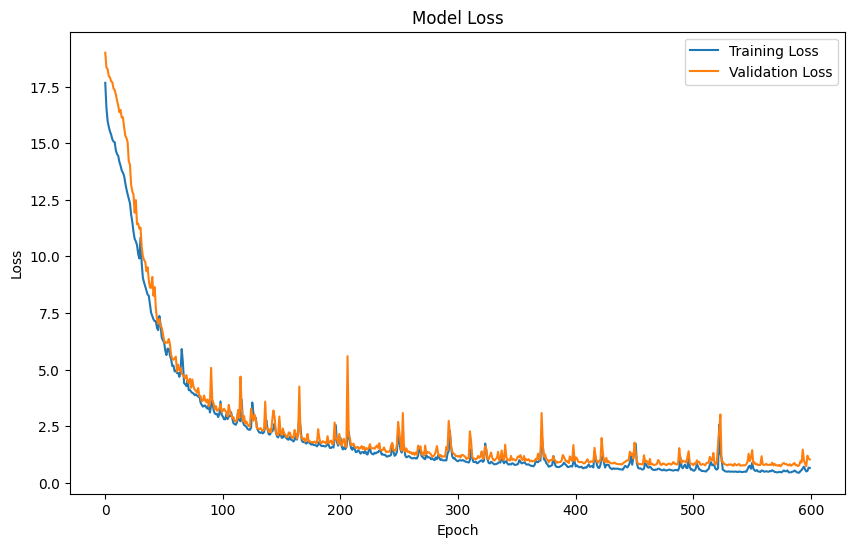

In [19]:




# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(40, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=600,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_val, y_val, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('pca_prediction_model.h5')

#For 100 epochs
#Training MSE: 11.6687
#Validation MSE: 13.3973
#Test MSE: 13.5282

Epoch 1/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 17.8452 - val_loss: 18.6648
Epoch 2/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7014 - val_loss: 17.9650
Epoch 3/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9021 - val_loss: 17.8802
Epoch 4/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8540 - val_loss: 17.5616
Epoch 5/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2761 - val_loss: 17.2185
Epoch 6/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9237 - val_loss: 17.4161
Epoch 7/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1895 - val_loss: 17.3431
Epoch 8/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7042 - val_loss: 16.4705
Epoch 9/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2892 - val_loss: 16.0736
Epoch 10/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.0122 - val_loss: 16.8828
Epoch 11/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5523 - val_loss: 15.4544
Epoch 12/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 

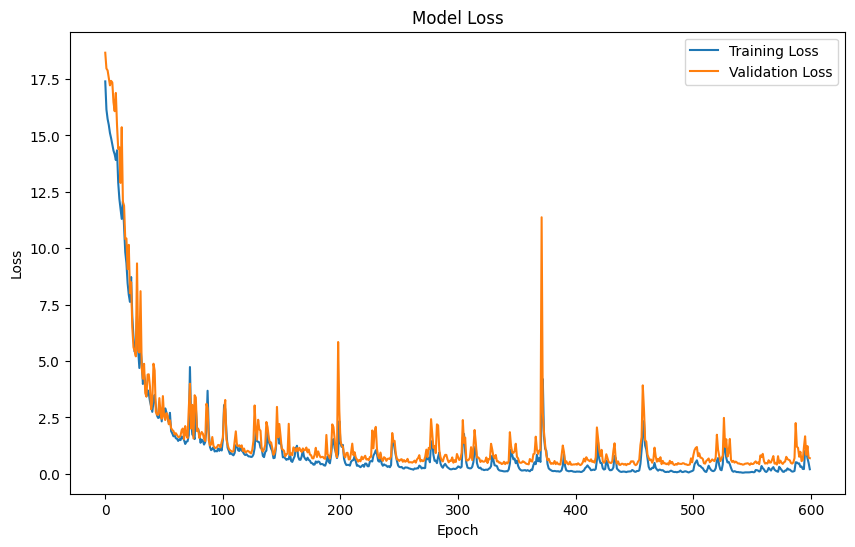

In [20]:


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(40, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=600,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_val, y_val, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('pca_prediction_model_300nodes_600epochs.h5')


**the finalized model 21 Aug 2024 9 00 PM**

Epoch 1/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 17.8995 - val_loss: 19.4528
Epoch 2/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.4104 - val_loss: 18.7775
Epoch 3/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8052 - val_loss: 18.5491
Epoch 4/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6576 - val_loss: 18.4052
Epoch 5/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8316 - val_loss: 18.3369
Epoch 6/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6452 - val_loss: 18.2522
Epoch 7/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8025 - val_loss: 18.1860
Epoch 8/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8259 - val_loss: 18.0760
Epoch 9/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9576 - val_loss: 18.0072
Epoch 10/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9437 - val_loss: 17.9373
Epoch 11/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3646 - val_loss: 17.8841
Epoch 12/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 

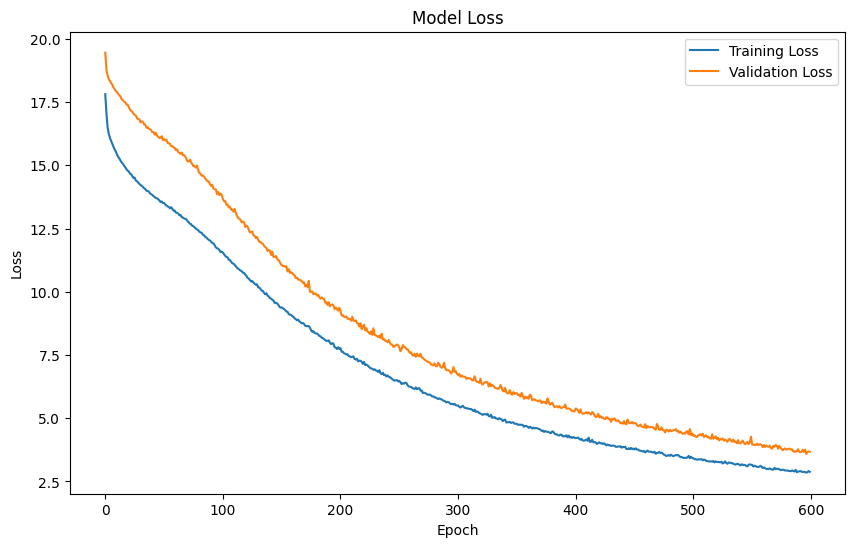

In [21]:


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(300, activation='relu'),
    Dense(40, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=600,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_val, y_val, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('pca_prediction_model_300nodes_single_hidden_600epochs.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


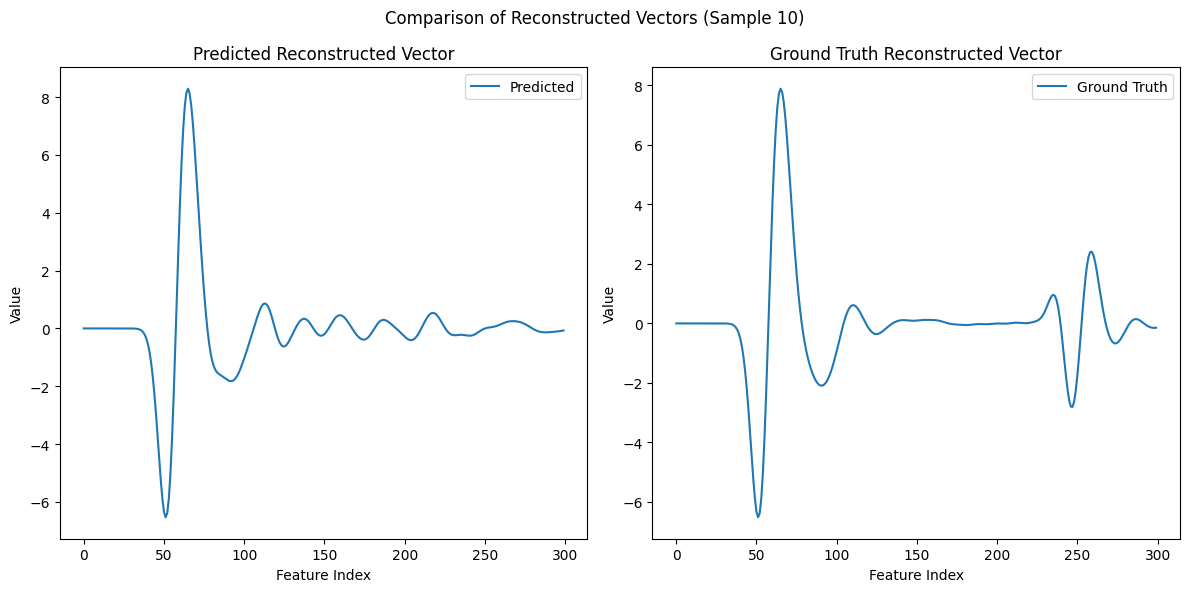

In [32]:

from joblib import load
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf
#Load the PCA model
pca = load('pca_model.joblib')


# Get a sample index from the test set
sample_index = 10  # Change this to the index of the sample you want to visualize

# Get the predicted PCA components for the sample
sample_input = X_test[sample_index].reshape(1, -1)

from tensorflow.keras.metrics import MeanSquaredError

# Register the custom metric with Keras
tf.keras.utils.get_custom_objects()['mse'] = MeanSquaredError()



model = tf.keras.models.load_model('pca_prediction_model_300nodes_single_hidden_600epochs.h5')
sample_predicted_pca = model.predict(sample_input)

# Get the ground truth PCA components for the sample
sample_true_pca = y_test[sample_index]

# Reconstruct the original 300-dimensional vectors
sample_predicted_vector = pca.inverse_transform(sample_predicted_pca)
sample_true_vector = pca.inverse_transform([sample_true_pca])

# Visualize the comparison
plt.figure(figsize=(12, 6))

# Plot the predicted reconstructed vector
plt.subplot(1, 2, 1)
plt.plot(sample_predicted_vector[0], label='Predicted')
plt.title('Predicted Reconstructed Vector')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()

# Plot the ground truth reconstructed vector
plt.subplot(1, 2, 2)
plt.plot(sample_true_vector[0], label='Ground Truth')
plt.title('Ground Truth Reconstructed Vector')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()

plt.suptitle(f'Comparison of Reconstructed Vectors (Sample {sample_index})')
plt.tight_layout()
plt.show()

In [9]:
print(max(X_train[0]))
print(min(X_train[0]))

11.64397827
0.029159761


**Reducing Learning Rate**

Epoch 1/600


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 19.6524 - val_loss: 20.0200
Epoch 2/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0053 - val_loss: 19.9684
Epoch 3/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4229 - val_loss: 19.9144
Epoch 4/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.8082 - val_loss: 19.8564
Epoch 5/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.8002 - val_loss: 19.7928
Epoch 6/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3628 - val_loss: 19.7216
Epoch 7/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.1695 - val_loss: 19.6444
Epoch 8/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2988 - val_loss: 19.5620
Epoch 9/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.3263 - val_loss: 19.4754
Epoch 10/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8129 - val_loss: 19.3884
Epoch 11/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9633 - val_loss: 19.3016
Epoch 12/600
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

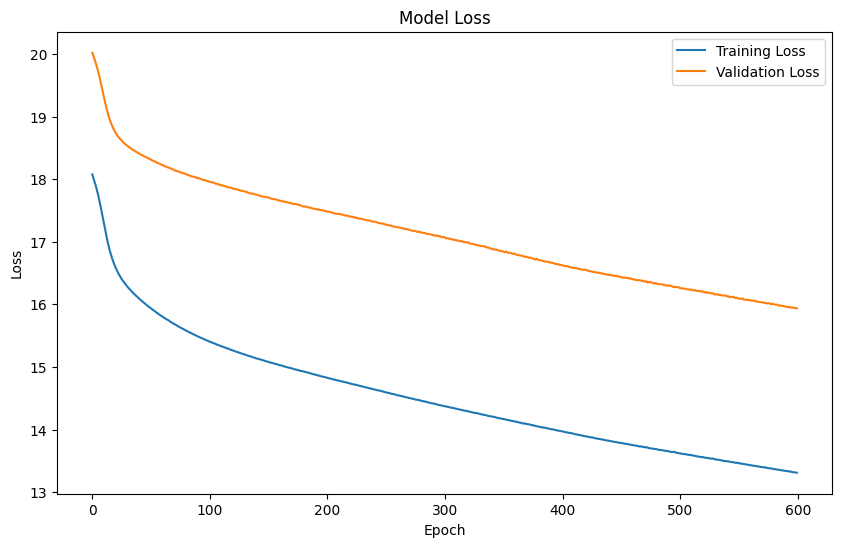

In [22]:


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(300, activation='relu'),
    Dense(40, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.0001, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=600, # epoch
                    batch_size=32,
                    verbose=1)

# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_val, y_val, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('pca_prediction_model_300nodes_single_hidden_pt0001lr_600epochs.h5')



**To view the reconstructed A scan from PCA components and reconstruct A scan from original PCA components**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


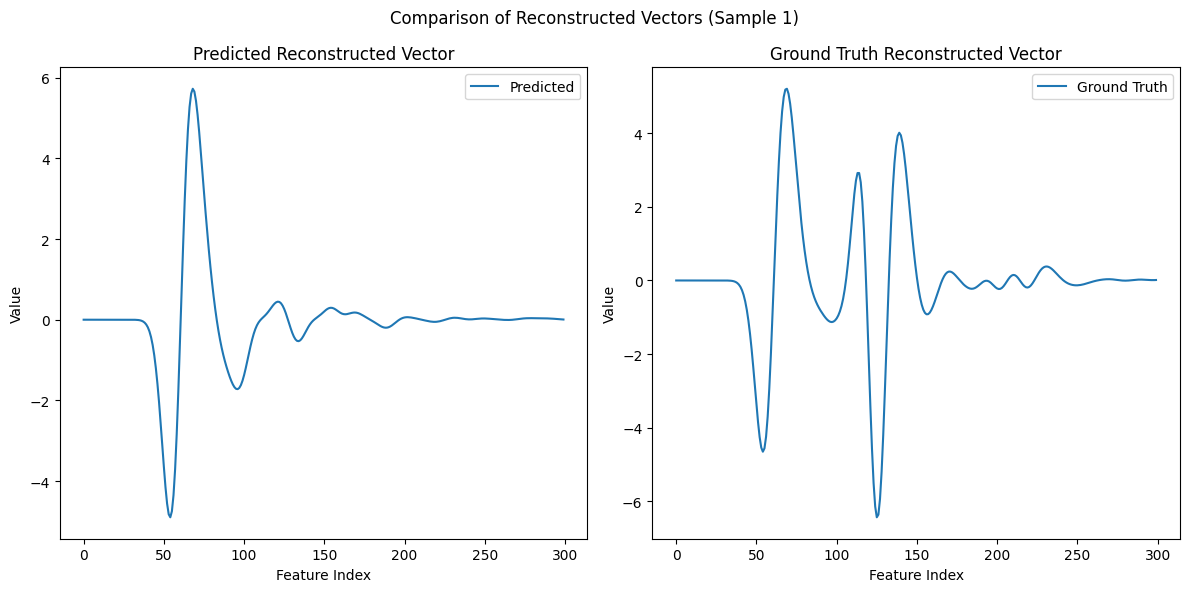

In [23]:

from joblib import load
import matplotlib.pyplot as plt
#Load the PCA model
pca = load('pca_model.joblib')


# Get a sample index from the test set
sample_index = 1  # Change this to the index of the sample you want to visualize

# Get the predicted PCA components for the sample
sample_input = X_test[sample_index].reshape(1, -1)
sample_predicted_pca = model.predict(sample_input)

# Get the ground truth PCA components for the sample
sample_true_pca = y_test[sample_index]

# Reconstruct the original 300-dimensional vectors
sample_predicted_vector = pca.inverse_transform(sample_predicted_pca)
sample_true_vector = pca.inverse_transform([sample_true_pca])

# Visualize the comparison
plt.figure(figsize=(12, 6))

# Plot the predicted reconstructed vector
plt.subplot(1, 2, 1)
plt.plot(sample_predicted_vector[0], label='Predicted')
plt.title('Predicted Reconstructed Vector')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()

# Plot the ground truth reconstructed vector
plt.subplot(1, 2, 2)
plt.plot(sample_true_vector[0], label='Ground Truth')
plt.title('Ground Truth Reconstructed Vector')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()

plt.suptitle(f'Comparison of Reconstructed Vectors (Sample {sample_index})')
plt.tight_layout()
plt.show()

**Just changing no of epochs to 1000.**

Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 18.1710 - val_loss: 20.0743
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0454 - val_loss: 19.9622
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.8447 - val_loss: 19.9073
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7460 - val_loss: 19.8776
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.6248 - val_loss: 19.8597
Epoch 6/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5284 - val_loss: 19.8475
Epoch 7/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0512 - val_loss: 19.8386
Epoch 8/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6852 - val_loss: 19.8300
Epoch 9/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.3685 - val_loss: 19.8280
Epoch 10/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6015 - val_loss: 19.8214
Epoch 11/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.3303 - val_loss: 19.8133
Epoch 12/1000
31/31 ━━━━━━━━━

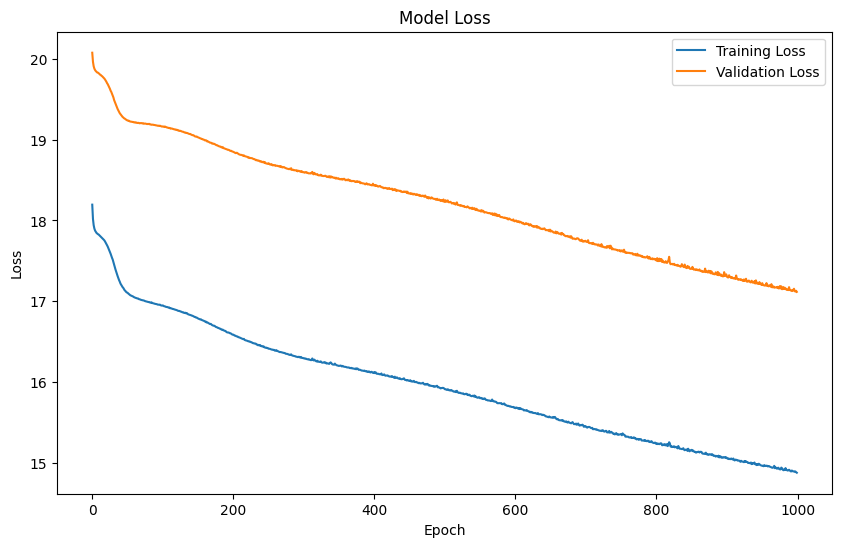

In [ ]:


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(300, activation='relu'),
    Dense(40, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.0001, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000, # epoch
                    batch_size=32,
                    verbose=1)

# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_val, y_val, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
model.save('pca_prediction_model_300nodes_single_hidden_pt0001lr_1000epochs.h5')